<a href="https://colab.research.google.com/github/InsightfulSantosh/Web-Scrapping/blob/main/Web%20Scrapping%20using%20BeatifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [272]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [273]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [274]:
def fetch_movie_details(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_details(url)





## **Fetching Movie URL's**

In [275]:
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
    url_list.append('https://www.justwatch.com'+x)

url_list=url_list[:50]
url_list

['https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil',
 'https://www.justwatch.com/in/movie/hit-man',
 'https://www.justwatch.com/in/movie/godzilla-minus-one',
 'https://www.justwatch.com/in/movie/the-fall-guy',
 'https://www.justwatch.com/in/movie/inside-out',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/furiosa',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/rockstar',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/maidaan',
 'https://www.justwatch.com/in/movie/civil-war-2024-0',
 'https://www.justwatch.com/in/movie/maha

###**Fetch all html movie pages**

In [276]:
import requests
from bs4 import BeautifulSoup
import time
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Example: Assuming you have already populated url_list with movie URLs
url_list = url_list

# Define a function to fetch movie pages
def fetch_movie_pages(movie_urls):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        # Add any necessary headers like API keys or tokens here
    }

    all_pages = []

    retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
    adapter = HTTPAdapter(max_retries=retry_strategy)
    session = requests.Session()
    session.mount('https://', adapter)
    session.mount('http://', adapter)

    for idx, url in enumerate(movie_urls, start=1):
        try:
            response = session.get(url, headers=headers)
            response.raise_for_status()

            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                all_pages.append(soup)
                print(f"Fetched page {idx} for {url}")
            else:
                print(f"Failed to fetch page {idx} for {url}. Status code:", response.status_code)

        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch page {idx} for {url}. Error: {e}")

        # Add a small delay to avoid overloading the server
        time.sleep(1)

    return all_pages

# Fetch all movie pages and return as a list of BeautifulSoup objects
html_pages = fetch_movie_pages(url_list)



Fetched page 1 for https://www.justwatch.com/in/movie/munjha
Fetched page 2 for https://www.justwatch.com/in/movie/aavesham-2024
Fetched page 3 for https://www.justwatch.com/in/movie/project-k
Fetched page 4 for https://www.justwatch.com/in/movie/family-star
Fetched page 5 for https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil
Fetched page 6 for https://www.justwatch.com/in/movie/hit-man
Fetched page 7 for https://www.justwatch.com/in/movie/godzilla-minus-one
Fetched page 8 for https://www.justwatch.com/in/movie/the-fall-guy
Fetched page 9 for https://www.justwatch.com/in/movie/inside-out
Fetched page 10 for https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire
Fetched page 11 for https://www.justwatch.com/in/movie/manjummel-boys
Fetched page 12 for https://www.justwatch.com/in/movie/furiosa
Fetched page 13 for https://www.justwatch.com/in/movie/laapataa-ladies
Fetched page 14 for https://www.justwatch.com/in/movie/rockstar
Fetched page 15 for https://www.jus

## **Scrapping Movie Title**

In [277]:
movie_names = []

# Iterating over html_pages
for idx, page in enumerate(html_pages, start=1):
    # Find the div with data-testid="titleBlock"
    title_block_div = page.find('div', attrs={'data-testid': 'titleBlock'})
    if title_block_div:
        # Find the <h1> tag for the movie title
        title_tag = title_block_div.find('h1')
        if title_tag:
            movie_title = title_tag.text.strip()
            movie_names.append(movie_title)
        else:
            movie_names.append(None)  # Add None if movie title is not found
    else:
        movie_names.append(None)  # Add None if title block is not found

# movie_names now contains the list of extracted movie names

movie_names

['Munjya',
 'Aavesham',
 'Kalki 2898 AD',
 'Family Star',
 'The Gangster, the Cop, the Devil',
 'Hit Man',
 'Godzilla Minus One',
 'The Fall Guy',
 'Inside Out',
 'Godzilla x Kong: The New Empire',
 'Manjummel Boys',
 'Furiosa: A Mad Max Saga',
 'Laapataa Ladies',
 'Rockstar',
 'Crew',
 'Dune: Part Two',
 'Maidaan',
 'Civil War',
 'Maharshi',
 'Aranmanai 4',
 'Maharaja',
 'Premalu',
 'Bade Miyan Chote Miyan',
 'Oppenheimer',
 'Mad Max: Fury Road',
 'Do Aur Do Pyaar',
 '365 Days',
 'Kung Fu Panda 4',
 'Challengers',
 'Srikanth',
 'Gangs of Godavari',
 'Hereditary',
 'Maharaj',
 'Madgaon Express',
 'Inside Out 2',
 'Exhuma',
 '12th Fail',
 'Garudan',
 'Animal',
 'Je Jatt Vigarh Gya',
 'Salaar',
 'Hanu-Man',
 'Varshangalkku Shesham',
 'The Goat Life',
 'Guruvayoor Ambalanadayil',
 'Dune',
 'Satyabhama',
 'Anyone But You',
 'Spider-Man: No Way Home',
 'Mallari']

## **Scrapping release Year**

In [278]:
release_dates = []

# Iterating over html_pages
for idx, page in enumerate(html_pages, start=1):
    # Find the <span> tag with the class "text-muted" for the release year
    span_tag = page.find('span', class_='text-muted')
    if span_tag:
        release_year = span_tag.text.strip('() ').strip()
        release_dates.append(release_year)
    else:
        release_dates.append(None)  # Add None if release year is not found

# release_dates now contains the list of extracted release years

release_dates

['2024',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2023',
 '2024',
 '2015',
 '2024',
 '2024',
 '2024',
 '2024',
 '2011',
 '2024',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2015',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2021',
 '2024',
 '2023',
 '2021',
 '2023']

## **Scrapping Genres**

In [279]:
# Write Your Code here
Generes = []

# Iterating over html_page
for idx, page in enumerate(html_pages, start=1):
    # Find the <span> tag with the class "detail-infos__value" for the Generes
    span_tag = page.find('span',class_='detail-infos__value')
    if span_tag:
        genre = span_tag.text
        Generes.append(genre)
    else:
        Generes.append(None)  # Add None if Generes is not found

# Generes now contains the list of extracted Genere

Generes

['Comedy, Horror',
 'Comedy, Action & Adventure',
 'Drama, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Action & Adventure, Drama, Comedy, Romance',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Crime, Comedy, Romance',
 'Horror, Action & Adventure, Drama, Science-Fiction',
 'Romance, Action & Adventure, Comedy, Drama',
 'Animation, Kids & Family, Action & Adventure, Drama, Comedy, Fantasy',
 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Mystery & Thriller, Action & Adventure, Science-Fiction',
 'Comedy, Drama',
 'Drama, Music & Musical, Romance',
 'Comedy, Drama',
 'Science-Fiction, Action & Adventure, Drama',
 'Sport, Drama, History',
 'Action & Adventure, Mystery & Thriller, War & Military, Drama',
 'Action & Adventure, Drama',
 'Horror, Comedy',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Romance',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Dram

###**Scrapping IMDB ratings**

In [280]:
import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
ratings = []

# XPath expressions for ratings and title
rating_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[2]/div/div/div[2]/div/span/span/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[1]/div/div/div[2]/div/span/span/text()'
]


# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)


        rating = None
        for xpath in rating_xpaths:
            rating = tree.xpath(xpath)
            if rating:
                rating = rating[0]
                break

        results.append((rating))
        ratings.append(rating)
        print(f"IMDb Rating: {rating}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(("Error fetching title", None))
        ratings.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(("Error processing title", None))
        ratings.append(None)

# Print results
for rating in results:
    if rating is not None:
        print(f" IMDb Rating: {rating}")
    else:
        print(f" IMDb Rating not available")

# Print all ratings
print("All Ratings:", ratings)



IMDb Rating:  7.2  (14k) 
IMDb Rating:  8.0  (12k) 
IMDb Rating:  7.9  (32k) 
IMDb Rating:  5.2  (3k) 
IMDb Rating:  6.9  (24k) 
IMDb Rating:  6.9  (61k) 
IMDb Rating:  7.7  (130k) 
IMDb Rating:  7.0  (115k) 
IMDb Rating:  8.1  (805k) 
IMDb Rating:  6.2  (81k) 
IMDb Rating:  8.3  (18k) 
IMDb Rating:  7.7  (120k) 
IMDb Rating:  8.5  (34k) 
IMDb Rating:  7.7  (49k) 
IMDb Rating:  5.9  (34k) 
IMDb Rating:  8.6  (467k) 
IMDb Rating:  8.1  (16k) 
IMDb Rating:  7.2  (125k) 
IMDb Rating:  7.2  (9k) 
IMDb Rating:  5.2  (1k) 
IMDb Rating:  8.6  (3k) 
IMDb Rating:  7.9  (12k) 
IMDb Rating:  4.1  (37k) 
IMDb Rating:  8.3  (763k) 
IMDb Rating:  8.1  (1m) 
IMDb Rating:  6.3  (5k) 
IMDb Rating:  3.3  (99k) 
IMDb Rating:  6.3  (45k) 
IMDb Rating:  7.3  (75k) 
IMDb Rating:  7.7  (7k) 
IMDb Rating:  5.1  
IMDb Rating:  7.3  (385k) 
IMDb Rating:  6.4  (6k) 
IMDb Rating:  7.1  (35k) 
IMDb Rating:  7.9  (61k) 
IMDb Rating:  6.9  (10k) 
IMDb Rating:  8.9  (120k) 
IMDb Rating:  7.3  (1k) 
IMDb Rating:  6.2 

## **Scrapping Runtime/Duration**

In [281]:
import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
runtimes = []

# XPath expressions for runtime
runtime_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[3]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[4]/div/text()'
]

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        runtime = None
        for xpath in runtime_xpaths:
            runtime = tree.xpath(xpath)
            if runtime:
                runtime = runtime[0]
                break

        results.append(runtime)
        runtimes.append(runtime)
        print(f"Runtime: {runtime}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(None)
        runtimes.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(None)
        runtimes.append(None)

# Print results
for runtime in results:
    if runtime is not None:
        print(f"Runtime: {runtime}")
    else:
        print(f"Runtime not available")

# Print all runtimes
print("All Runtimes:", runtimes)


Runtime: 2h 3min
Runtime: 2h 38min
Runtime: 3h 1min
Runtime: 2h 39min
Runtime: 1h 50min
Runtime: 1h 56min
Runtime: 2h 5min
Runtime: 2h 6min
Runtime: 1h 35min
Runtime: 1h 55min
Runtime: 2h 15min
Runtime: 2h 28min
Runtime: 2h 2min
Runtime: 2h 39min
Runtime: 1h 58min
Runtime: 2h 47min
Runtime: 3h 1min
Runtime: 1h 49min
Runtime: 2h 56min
Runtime: 2h 28min
Runtime: 2h 30min
Runtime: 2h 36min
Runtime: 2h 44min
Runtime: 3h 0min
Runtime: 2h 1min
Runtime: 2h 20min
Runtime: 1h 54min
Runtime: 1h 34min
Runtime: 2h 12min
Runtime: 2h 14min
Runtime: 2h 23min
Runtime: 2h 6min
Runtime: 2h 12min
Runtime: 2h 23min
Runtime: 1h 37min
Runtime: 2h 14min
Runtime: 2h 26min
Runtime: 2h 13min
Runtime: 3h 21min
Runtime: 2h 12min
Runtime: 2h 55min
Runtime: 2h 39min
Runtime: 2h 46min
Runtime: 2h 52min
Runtime: 2h 12min
Runtime: 2h 35min
Runtime: 2h 12min
Runtime: 1h 44min
Runtime: 2h 28min
Runtime: 2h 9min
Runtime: 2h 3min
Runtime: 2h 38min
Runtime: 3h 1min
Runtime: 2h 39min
Runtime: 1h 50min
Runtime: 1h 56min
Runt

## **Scrapping Age Rating**

In [282]:
import requests
from lxml import html

# List of IMDb URLs
urls = url_list
# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
age_ratings = []

# XPath expression for age rating
age_rating_xpath = '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[5]/div/text()'

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        age_rating = tree.xpath(age_rating_xpath)
        age_rating = age_rating[0] if age_rating else None

        if age_rating in ["UA", "A", "U"]:
            age_ratings.append(age_rating)
            print(f"Age Rating: {age_rating}")
        else:
            age_ratings.append(None)
            print("Age Rating not in ['UA', 'A', 'U']")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        age_ratings.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        age_ratings.append(None)

# Print all age ratings
print("All Age Ratings:", age_ratings)


Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: U
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating: UA
Age Rating: UA
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: U
Age Rating: UA
Age Rating: UA
Age Rating: A
Age Rating: UA
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: U
Age Rating: UA
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating: A
Ag

## **Fetching Production Countries Details**

In [283]:
import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
production_countries = []

# XPath expressions for production country
production_country_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[6]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[5]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[4]/div/text()'
]

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        production_country = None
        for xpath in production_country_xpaths:
            production_country = tree.xpath(xpath)
            if production_country:
                production_country = production_country[0].strip()
                break

        results.append(production_country)
        production_countries.append(production_country)
        print(f"Production Country: {production_country}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(None)
        production_countries.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(None)
        production_countries.append(None)

# Print results
for production_country in results:
    if production_country is not None:
        print(f"Production Country: {production_country}")
    else:
        print(f"Production Country not available")

# Print all production countries
print("All Production Countries:", production_countries)


Production Country: India
Production Country: India
Production Country: India
Production Country: India
Production Country: South Korea
Production Country: United States
Production Country: Japan
Production Country: Canada, United States, Australia
Production Country: United States
Production Country: United States, Australia
Production Country: India
Production Country: Australia, United States
Production Country: India
Production Country: India
Production Country: India
Production Country: United States
Production Country: India
Production Country: United States, United Kingdom
Production Country: India
Production Country: India
Production Country: India
Production Country: India
Production Country: India
Production Country: United Kingdom, United States
Production Country: Australia, United States
Production Country: India
Production Country: Poland
Production Country: United States
Production Country: Italy, United States
Production Country: India
Production Country: India
Producti

## **Fetching Streaming Service Details**

In [284]:
from bs4 import BeautifulSoup
import requests

# Example URL list (replace with your actual URLs)
url_list = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store streaming service values
stream = []  # List to store streaming service values

# Loop through the list of URLs, up to a maximum of 50 URLs
for url in url_list:
    try:
        # Send a GET request, passing headers
        response = session.get(url, headers=headers)
        response.raise_for_status()

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the first <img> tag with class 'offer__icon'
        icon = soup.find('img', class_='offer__icon')

        # Extract the 'alt' attribute (streaming service name)
        if icon:
            alt = icon.get('alt')
            stream.append(alt)
            print(f"URL: {url}")
            print(f"Streaming Service: {alt}")
        else:
            print(f"No streaming service found for URL: {url}")
            stream.append("No streaming service found")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        stream.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        stream.append(None)

# Print all streaming service values collected
print("All Streaming Services:", stream)


URL: https://www.justwatch.com/in/movie/munjha
Streaming Service: Bookmyshow
URL: https://www.justwatch.com/in/movie/aavesham-2024
Streaming Service: Amazon Prime Video
URL: https://www.justwatch.com/in/movie/project-k
Streaming Service: Bookmyshow
URL: https://www.justwatch.com/in/movie/family-star
Streaming Service: Amazon Prime Video
URL: https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil
Streaming Service: Lionsgate Play
URL: https://www.justwatch.com/in/movie/hit-man
Streaming Service: Netflix
URL: https://www.justwatch.com/in/movie/godzilla-minus-one
Streaming Service: Netflix
URL: https://www.justwatch.com/in/movie/the-fall-guy
Streaming Service: Apple TV
URL: https://www.justwatch.com/in/movie/inside-out
Streaming Service: Apple TV
URL: https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire
Streaming Service: Apple TV
URL: https://www.justwatch.com/in/movie/manjummel-boys
Streaming Service: Hotstar
URL: https://www.justwatch.com/in/movie/furiosa
Stream

In [285]:
len(stream)

50

## **Now Creating Movies DataFrame**

In [286]:
# Write Your Code here
import pandas as pd

# Assuming 'movie_names' and 'release_dates' are lists of equal length (50)
movies=pd.DataFrame({'Movie Name': movie_names, 'release_dates': release_dates,'Generes': Generes,"IMDB_ratings":ratings,"runtimes":runtimes,
              "age_ratings":age_ratings,"production_countries":production_countries,"streaming service":stream,"link":url_list})

movies.to_csv('movies.csv', index=False)

In [287]:
movies.head()

,Movie Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Munjya,2024,"Comedy, Horror",7.2 (14k),2h 3min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha
1,Aavesham,2024,"Comedy, Action & Adventure",8.0 (12k),2h 38min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
2,Kalki 2898 AD,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9 (32k),3h 1min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.2 (3k),2h 39min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
4,"The Gangster, the Cop, the Devil",2019,"Mystery & Thriller, Action & Adventure, Crime",6.9 (24k),1h 50min,None,South Korea,Lionsgate Play,https://www.justwatch.com/in/movie/the-gangste...


## **Scraping TV  Show Data**

In [288]:
def fetch_movie_details(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_movie_details(url)

print(soup.prettify())



<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [289]:
tv_links = soup.find_all('a', href=True)
tv_urls = [link['href'] for link in tv_links if '/tv-show/' in link['href']]

url_list=[]
for x in tv_urls:
    url_list.append('https://www.justwatch.com'+x)

url_list=url_list[:50]
url_list


['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/gullak',
 'https://www.justwatch.com/in/tv-show/kota-factory',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/raising-voices',
 'https://www.justwatch.com/in/tv-show/the-bear',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/dark-matter-2024',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/presumed-innocent',
 'https://www.justwatch.com/in/tv-show/fargo',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv

In [290]:
import requests
from bs4 import BeautifulSoup
import time
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Example: Assuming you have already populated url_list with movie URLs
url_list = url_list

# Define a function to fetch movie pages
def fetch_movie_pages(tv_urls):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        # Add any necessary headers like API keys or tokens here
    }

    all_pages = []

    retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
    adapter = HTTPAdapter(max_retries=retry_strategy)
    session = requests.Session()
    session.mount('https://', adapter)
    session.mount('http://', adapter)

    for idx, url in enumerate(tv_urls, start=1):
        try:
            response = session.get(url, headers=headers)
            response.raise_for_status()

            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                all_pages.append(soup)
                print(f"Fetched page {idx} for {url}")
            else:
                print(f"Failed to fetch page {idx} for {url}. Status code:", response.status_code)

        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch page {idx} for {url}. Error: {e}")

        # Add a small delay to avoid overloading the server
        time.sleep(1)

    return all_pages

# Fetch all movie pages and return as a list of BeautifulSoup objects
html_pages2 = fetch_movie_pages(url_list)

Fetched page 1 for https://www.justwatch.com/in/tv-show/mirzapur
Fetched page 2 for https://www.justwatch.com/in/tv-show/panchayat
Fetched page 3 for https://www.justwatch.com/in/tv-show/house-of-the-dragon
Fetched page 4 for https://www.justwatch.com/in/tv-show/the-boys
Fetched page 5 for https://www.justwatch.com/in/tv-show/gullak
Fetched page 6 for https://www.justwatch.com/in/tv-show/kota-factory
Fetched page 7 for https://www.justwatch.com/in/tv-show/bridgerton
Fetched page 8 for https://www.justwatch.com/in/tv-show/game-of-thrones
Fetched page 9 for https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba
Fetched page 10 for https://www.justwatch.com/in/tv-show/shogun-2024
Fetched page 11 for https://www.justwatch.com/in/tv-show/raising-voices
Fetched page 12 for https://www.justwatch.com/in/tv-show/the-bear
Fetched page 13 for https://www.justwatch.com/in/tv-show/heeramandi
Fetched page 14 for https://www.justwatch.com/in/tv-show/dark-matter-2024
Fetched page 15 for ht

## **Fetching Tv Show Title details**

In [291]:
show_names = []

# Iterating over html_pages2
for page in html_pages2:
    # Find the div with class 'title-block' (assuming there is only one)
    title_div = page.find('div', class_='title-block')

    if title_div:
        # Extract the text of the span tag within the div
        show_name = title_div.find('h1').text.strip()
        show_names.append(show_name)
    else:
        show_names.append(None)

show_names


['Mirzapur',
 'Panchayat',
 'House of the Dragon',
 'The Boys',
 'Gullak',
 'Kota Factory',
 'Bridgerton',
 'Game of Thrones',
 'Demon Slayer: Kimetsu no Yaiba',
 'Shōgun',
 'Raising Voices',
 'The Bear',
 'Heeramandi: The Diamond Bazaar',
 'Dark Matter',
 'Apharan',
 'Presumed Innocent',
 'Fargo',
 'Aashram',
 'Attack on Titan',
 'Sunflower',
 'Fallout',
 'The Acolyte',
 'Farzi',
 'Supacell',
 'The Good Doctor',
 '3 Body Problem',
 'Bigg Boss OTT',
 'Evil',
 'Maxton Hall: The World Between Us',
 'Jamnapaar',
 'Stranger Things',
 'From',
 'Breaking Bad',
 'Mastram',
 'Money Heist',
 'Asur: Welcome to Your Dark Side',
 "Joko Anwar's Nightmares and Daydreams",
 'The Family Man',
 'Tulsa King',
 'MTV Splitsvilla',
 'The Orville',
 'The Rookie',
 'True Detective',
 'Jujutsu Kaisen',
 'My Demon',
 'Kaiju No. 8',
 'Peaky Blinders',
 'Bigg Boss',
 'The Legend of Hanuman',
 'The Mole']

## **Fetching Release Year**

In [292]:
release_years = []

# Iterating over html_pages2
for page in html_pages2:
    # Find the div with class 'title-block' (assuming there is only one)
    title_div = page.find('div', class_='title-block')

    if title_div:
        # Extract the text of the span tag within the div (assuming release year is within this structure)
        release_year = title_div.find('span').text.strip()
        release_years.append(release_year)
    else:
        release_years.append(None)

release_years





['(2018)',
 '(2020)',
 '(2022)',
 '(2019)',
 '(2019)',
 '(2019)',
 '(2020)',
 '(2011)',
 '(2019)',
 '(2024)',
 '(2024)',
 '(2022)',
 '(2024)',
 '(2024)',
 '(2018)',
 '(2024)',
 '(2014)',
 '(2020)',
 '(2013)',
 '(2021)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2017)',
 '(2024)',
 '(2021)',
 '(2019)',
 '(2024)',
 '(2024)',
 '(2016)',
 '(2022)',
 '(2008)',
 '(2020)',
 '(2017)',
 '(2020)',
 '(2024)',
 '(2019)',
 '(2022)',
 '(2008)',
 '(2017)',
 '(2018)',
 '(2014)',
 '(2020)',
 '(2023)',
 '(2024)',
 '(2013)',
 '(2006)',
 '(2021)',
 '(2022)']

## **Fetching TV Show Genre Details**

In [293]:
# Write Your Code here

Generes = []

# Iterating over html_page
for idx, page in enumerate(html_pages2, start=1):
    # Find the <span> tag with the class "detail-infos__value" for the Generes
    span_tag = page.find('span',class_='detail-infos__value')
    if span_tag:
        genre = span_tag.text
        Generes.append(genre)
    else:
        Generes.append(None)  # Add None if Generes is not found

# Generes now contains the list of extracted Genere

Generes

['Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Drama, Comedy',
 'Romance, Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Action & Adventure, Science-Fiction, Comedy, Crime, Drama',
 'Kids & Family, Comedy, Drama',
 'Comedy, Drama',
 'Drama, Romance',
 'Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Animation, Action & Adventure, Fantasy, Mystery & Thriller',
 'War & Military, Drama, History',
 'Drama',
 'Drama, Comedy',
 'History, Romance, Drama, War & Military',
 'Drama, Science-Fiction, Mystery & Thriller',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Crime, Mystery & Thriller, Drama',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Crime, Mystery & Thriller',
 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction',
 'Comedy, Crime',
 'Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller',
 'Mystery & Thriller, Science-Fiction, Action & Adventure, Drama, Fantasy',
 'Crime, Drama, Mystery & Thriller'

## **Fetching IMDB Rating Details**

In [294]:
# Write Your Code here
import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
ratings = []

# XPath expressions for ratings and title
rating_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[2]/div/div/div[2]/div/span/span/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[1]/div/div/div[2]/div/span/span/text()'
]


# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)


        rating = None
        for xpath in rating_xpaths:
            rating = tree.xpath(xpath)
            if rating:
                rating = rating[0]
                break

        results.append((rating))
        ratings.append(rating)
        print(f"IMDb Rating: {rating}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(("Error fetching title", None))
        ratings.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(("Error processing title", None))
        ratings.append(None)

# Print results
for rating in results:
    if rating is not None:
        print(f" IMDb Rating: {rating}")
    else:
        print(f" IMDb Rating not available")

# Print all ratings
print("All Ratings:", ratings)



IMDb Rating:  8.5  (83k) 
IMDb Rating:  9.0  (94k) 
IMDb Rating:  8.4  (400k) 
IMDb Rating:  8.7  (682k) 
IMDb Rating:  9.1  (23k) 
IMDb Rating:  9.0  (83k) 
IMDb Rating:  7.4  (186k) 
IMDb Rating:  9.2  (2m) 
IMDb Rating:  8.6  (156k) 
IMDb Rating:  8.7  (149k) 
IMDb Rating:  7.2  (3k) 
IMDb Rating:  8.6  (225k) 
IMDb Rating:  6.4  (27k) 
IMDb Rating:  7.8  (25k) 
IMDb Rating:  8.2  (19k) 
IMDb Rating:  7.6  (6k) 
IMDb Rating:  8.9  (425k) 
IMDb Rating:  7.4  (32k) 
IMDb Rating:  9.1  (526k) 
IMDb Rating:  7.4  (24k) 
IMDb Rating:  8.4  (220k) 
IMDb Rating:  3.5  (80k) 
IMDb Rating:  8.4  (46k) 
IMDb Rating:  6.8  (5k) 
IMDb Rating:  8.0  (116k) 
IMDb Rating:  7.5  (128k) 
IMDb Rating:  1.9  (1k) 
IMDb Rating:  7.8  (37k) 
IMDb Rating:  7.6  (10k) 
IMDb Rating:  8.3  (2k) 
IMDb Rating:  8.7  (1m) 
IMDb Rating: []
IMDb Rating:  9.5  (2m) 
IMDb Rating:  6.9  (2k) 
IMDb Rating:  8.2  (538k) 
IMDb Rating:  8.5  (66k) 
IMDb Rating:  6.6  (1k) 
IMDb Rating:  8.7  (99k) 
IMDb Rating:  8.0  (

## **Fetching Age Rating Details**

In [295]:
# Write Your Code here
import requests
from lxml import html

# List of IMDb URLs
urls = url_list
# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
age_ratings = []

# XPath expression for age rating
age_rating_xpath = '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[5]/div/text()'

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        age_rating = tree.xpath(age_rating_xpath)
        age_rating = age_rating[0] if age_rating else None

        if age_rating in ["UA", "A", "U"]:
            age_ratings.append(age_rating)
            print(f"Age Rating: {age_rating}")
        else:
            age_ratings.append(None)
            print("Age Rating not in ['UA', 'A', 'U']")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        age_ratings.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        age_ratings.append(None)

# Print all age ratings
print("All Age Ratings:", age_ratings)


Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: A
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: A
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating: A
Age Rating: U
Age Rating not in ['UA', 'A', 'U']
Age Rating: UA
Age Rating: A
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: U
Age Rating: A
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating: U
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating not in ['UA', 'A', 'U']
Age Rating n

## **Fetching Production Country details**

In [296]:
# Write Your Code here
import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
production_countries = []

# XPath expressions for production country
production_country_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[6]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[5]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[4]/div/text()'
]

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        production_country = None
        for xpath in production_country_xpaths:
            production_country = tree.xpath(xpath)
            if production_country:
                production_country = production_country[0].strip()
                break

        results.append(production_country)
        production_countries.append(production_country)
        print(f"Production Country: {production_country}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(None)
        production_countries.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(None)
        production_countries.append(None)

# Print results
for production_country in results:
    if production_country is not None:
        print(f"Production Country: {production_country}")
    else:
        print(f"Production Country not available")

# Print all production countries
print("All Production Countries:", production_countries)


Production Country: India
Production Country: India
Production Country: United States
Production Country: United States
Production Country: India
Production Country: India
Production Country: United States
Production Country: United States, United Kingdom
Production Country: Japan
Production Country: United States
Production Country: Spain
Production Country: United States
Production Country: India
Production Country: United States
Production Country: India
Production Country: United States
Production Country: United States
Production Country: India
Production Country: Japan
Production Country: India
Production Country: United States
Production Country: United States
Production Country: India
Production Country: United Kingdom
Production Country: United States
Production Country: United States
Production Country: India
Production Country: United States
Production Country: Germany
Production Country: India
Production Country: United States
Production Country: []
Production Country: Unit

## **Fetching Streaming Service details**

In [297]:
from bs4 import BeautifulSoup
import requests

# Example URL list (replace with your actual URLs)
url_list = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

stream = []  # List to store streaming service values

# Loop through the list of URLs, up to a maximum of 50 URLs
for url in url_list:
    try:
        # Send a GET request, passing headers
        response = session.get(url, headers=headers)
        response.raise_for_status()

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the first <img> tag with class 'offer__icon'
        icon = soup.find('img', class_='offer__icon')

        # Extract the 'alt' attribute (streaming service name)
        if icon:
            alt = icon.get('alt')
            stream.append(alt)
            print(f"URL: {url}")
            print(f"Streaming Service: {alt}")
        else:
            print(f"No streaming service found for URL: {url}")
            stream.append("No streaming service found")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        stream.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        stream.append(None)

# Print all streaming service values collected
print("All Streaming Services:", stream)


URL: https://www.justwatch.com/in/tv-show/mirzapur
Streaming Service: Amazon Prime Video
URL: https://www.justwatch.com/in/tv-show/panchayat
Streaming Service: Amazon Prime Video
URL: https://www.justwatch.com/in/tv-show/house-of-the-dragon
Streaming Service: Jio Cinema
URL: https://www.justwatch.com/in/tv-show/the-boys
Streaming Service: Amazon Prime Video
URL: https://www.justwatch.com/in/tv-show/gullak
Streaming Service: Sony Liv
URL: https://www.justwatch.com/in/tv-show/kota-factory
Streaming Service: Netflix
URL: https://www.justwatch.com/in/tv-show/bridgerton
Streaming Service: Netflix
URL: https://www.justwatch.com/in/tv-show/game-of-thrones
Streaming Service: Jio Cinema
URL: https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba
Streaming Service: Crunchyroll
URL: https://www.justwatch.com/in/tv-show/shogun-2024
Streaming Service: Hotstar
URL: https://www.justwatch.com/in/tv-show/raising-voices
Streaming Service: Netflix
URL: https://www.justwatch.com/in/tv-show/the

## **Fetching Duration Details**

In [298]:
# Write Your Code here

import requests
from lxml import html

# List of IMDb URLs
urls = url_list

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

retry_strategy = Retry(
        total=3,  # Retry a maximum of 3 times
        backoff_factor=2,  # Exponential backoff factor
        status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
    )
adapter = HTTPAdapter(max_retries=retry_strategy)
session = requests.Session()
session.mount('https://', adapter)
session.mount('http://', adapter)

# List to store results
results = []
runtimes = []

# XPath expressions for runtime
runtime_xpaths = [
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[3]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[4]/div/text()',
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[5]/div/text()'
    '//*[@id="base"]/div[1]/div[2]/div/div[1]/div/aside/div[1]/div[2]/div[6]/div/text()',
]

# Loop through the list of URLs
for url in urls:
    try:
        response = session.get(url, headers=headers)
        response.raise_for_status()

        tree = html.fromstring(response.content)

        runtime = None
        for xpath in runtime_xpaths:
            runtime = tree.xpath(xpath)
            if runtime:
                runtime = runtime[0]
                break

        results.append(runtime)
        runtimes.append(runtime)
        print(f"Runtime: {runtime}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        results.append(None)
        runtimes.append(None)
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        results.append(None)
        runtimes.append(None)

# Print results
for runtime in results:
    if runtime is not None:
        print(f"Runtime: {runtime}")
    else:
        print(f"Runtime not available")

# Print all runtimes
print("All Runtimes:", runtimes)



Runtime: 50min
Runtime: 35min
Runtime: 59min
Runtime: 1h 2min
Runtime: 30min
Runtime: 43min
Runtime: 1h 2min
Runtime: 58min
Runtime: 26min
Runtime: 59min
Runtime: 46min
Runtime: 34min
Runtime: 54min
Runtime: 52min
Runtime: 24min
Runtime: 42min
Runtime: 52min
Runtime: 43min
Runtime: 25min
Runtime: 38min
Runtime: 59min
Runtime: 36min
Runtime: 56min
Runtime: 52min
Runtime: 43min
Runtime: 56min
Runtime: 1h 30min
Runtime: 49min
Runtime: 45min
Runtime: 32min
Runtime: 1h 1min
Runtime: United States
Runtime: 47min
Runtime: 28min
Runtime: 51min
Runtime: 47min
Runtime: 52min
Runtime: 45min
Runtime: 38min
Runtime: 44min
Runtime: 53min
Runtime: 43min
Runtime: 1h 1min
Runtime: 24min
Runtime: 1h 6min
Runtime: 24min
Runtime: 58min
Runtime: 1h 16min
Runtime: 21min
Runtime: 44min
Runtime: 50min
Runtime: 35min
Runtime: 59min
Runtime: 1h 2min
Runtime: 30min
Runtime: 43min
Runtime: 1h 2min
Runtime: 58min
Runtime: 26min
Runtime: 59min
Runtime: 46min
Runtime: 34min
Runtime: 54min
Runtime: 52min
Runtime: 24m

## **Creating TV Show DataFrame**

In [299]:
# Write Your Code here
# Assuming 'tv_show_names' and 'release_dates' are lists of equal length (50)
tv_show=pd.DataFrame({'Show Name': show_names, 'release_dates': release_dates,'Generes': Generes,"IMDB_ratings":ratings,"runtimes":runtimes,
              "age_ratings":age_ratings,"production_countries":production_countries,"streaming service":stream,"link":url_list})

In [301]:
tv_show

,Show Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Mirzapur,2024,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (83k),50min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
1,Panchayat,2024,"Drama, Comedy",9.0 (94k),35min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
2,House of the Dragon,2024,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4 (400k),59min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
3,The Boys,2024,"Action & Adventure, Science-Fiction, Comedy, C...",8.7 (682k),1h 2min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/the-boys
4,Gullak,2019,"Kids & Family, Comedy, Drama",9.1 (23k),30min,None,India,Sony Liv,https://www.justwatch.com/in/tv-show/gullak
5,Kota Factory,2024,"Comedy, Drama",9.0 (83k),43min,None,India,Netflix,https://www.justwatch.com/in/tv-show/kota-factory
6,Bridgerton,2023,"Drama, Romance",7.4 (186k),1h 2min,A,United States,Netflix,https://www.justwatch.com/in/tv-show/bridgerton
7,Game of Thrones,2024,"Action & Adventure, Drama, Fantasy, Science-Fi...",9.2 (2m),58min,A,"United States, United Kingdom",Jio Cinema,https://www.justwatch.com/in/tv-show/game-of-t...
8,Demon Slayer: Kimetsu no Yaiba,2015,"Animation, Action & Adventure, Fantasy, Myster...",8.6 (156k),26min,None,Japan,Crunchyroll,https://www.justwatch.com/in/tv-show/demon-sla...
9,Shōgun,2024,"War & Military, Drama, History",8.7 (149k),59min,None,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024


## **Task 2 :- Data Filtering & Analysis**

**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```



In [302]:
# Write Your Code here
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Name            50 non-null     object
 1   release_dates         50 non-null     object
 2   Generes               50 non-null     object
 3   IMDB_ratings          50 non-null     object
 4   runtimes              50 non-null     object
 5   age_ratings           25 non-null     object
 6   production_countries  50 non-null     object
 7   streaming service     50 non-null     object
 8   link                  50 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [303]:
#Only include movies and TV shows released in the last 2 years (from the current date).
movies['release_dates']=movies['release_dates'].astype('int')
movies_new=movies[movies['release_dates']>2022]

tv_show['release_dates']=tv_show['release_dates'].astype('int')
tv_show_new=tv_show[tv_show['release_dates']>2022]

In [304]:
movies_new.head()

,Movie Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Munjya,2024,"Comedy, Horror",7.2 (14k),2h 3min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha
1,Aavesham,2024,"Comedy, Action & Adventure",8.0 (12k),2h 38min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
2,Kalki 2898 AD,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9 (32k),3h 1min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.2 (3k),2h 39min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
5,Hit Man,2024,"Crime, Comedy, Romance",6.9 (61k),1h 56min,A,United States,Netflix,https://www.justwatch.com/in/movie/hit-man


In [305]:
tv_show_new.head()

,Show Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Mirzapur,2024,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (83k),50min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
1,Panchayat,2024,"Drama, Comedy",9.0 (94k),35min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
2,House of the Dragon,2024,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4 (400k),59min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
3,The Boys,2024,"Action & Adventure, Science-Fiction, Comedy, C...",8.7 (682k),1h 2min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/the-boys
5,Kota Factory,2024,"Comedy, Drama",9.0 (83k),43min,None,India,Netflix,https://www.justwatch.com/in/tv-show/kota-factory


In [306]:
movies_new["IMDB_ratings"]=movies_new["IMDB_ratings"].str.split().str[0].astype(float)
tv_show_new["IMDB_ratings"]=tv_show_new["IMDB_ratings"].str.split().str[0].astype(float)

<ipython-input-306-9bd15d846637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new["IMDB_ratings"]=movies_new["IMDB_ratings"].str.split().str[0].astype(float)
<ipython-input-306-9bd15d846637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_new["IMDB_ratings"]=tv_show_new["IMDB_ratings"].str.split().str[0].astype(float)


In [307]:
#Only include movies and TV shows with an IMDb rating of 7 or higher
movies_new=movies_new[movies_new['IMDB_ratings']>=7]
tv_show_new=tv_show_new[tv_show_new['IMDB_ratings']>=7]

In [308]:
movies_new.head()

,Movie Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Munjya,2024,"Comedy, Horror",7.2,2h 3min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha
1,Aavesham,2024,"Comedy, Action & Adventure",8.0,2h 38min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
2,Kalki 2898 AD,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9,3h 1min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k
6,Godzilla Minus One,2023,"Horror, Action & Adventure, Drama, Science-Fic...",7.7,2h 5min,None,Japan,Netflix,https://www.justwatch.com/in/movie/godzilla-mi...
7,The Fall Guy,2024,"Romance, Action & Adventure, Comedy, Drama",7.0,2h 6min,None,"Canada, United States, Australia",Apple TV,https://www.justwatch.com/in/movie/the-fall-guy


In [309]:
tv_show_new.head()

,Show Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Mirzapur,2024,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,50min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
1,Panchayat,2024,"Drama, Comedy",9.0,35min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
2,House of the Dragon,2024,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4,59min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
3,The Boys,2024,"Action & Adventure, Science-Fiction, Comedy, C...",8.7,1h 2min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/the-boys
5,Kota Factory,2024,"Comedy, Drama",9.0,43min,None,India,Netflix,https://www.justwatch.com/in/tv-show/kota-factory


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      

In [310]:
movies_new.describe()

,release_dates,IMDB_ratings
count,23.000000,23.000000
mean,2023.869565,7.856522
std,0.344350,0.573527
min,2023.000000,7.000000
25%,2024.000000,7.300000
50%,2024.000000,7.900000
75%,2024.000000,8.300000
max,2024.000000,8.900000


In [311]:
tv_show_new.describe()

,release_dates,IMDB_ratings
count,34.000000,34.000000
mean,2023.882353,8.276471
std,0.327035,0.596992
min,2023.000000,7.200000
25%,2024.000000,7.725000
50%,2024.000000,8.400000
75%,2024.000000,8.700000
max,2024.000000,9.500000


In [312]:
# Write Your Code here
print(f'average IMDb rating for moviews: {movies_new["IMDB_ratings"].mean()}')
print(f'average IMDb rating for tv shows: {tv_show_new["IMDB_ratings"].mean()}')


average IMDb rating for moviews: 7.856521739130436
average IMDb rating for tv shows: 8.276470588235295


## **Analyzing Top Genres**

In [321]:
movies.head(5)

,Movie Name,release_dates,Generes,IMDB_ratings,runtimes,age_ratings,production_countries,streaming service,link
0,Munjya,2024,"Comedy, Horror",7.2 (14k),2h 3min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/munjha
1,Aavesham,2024,"Comedy, Action & Adventure",8.0 (12k),2h 38min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
2,Kalki 2898 AD,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9 (32k),3h 1min,None,India,Bookmyshow,https://www.justwatch.com/in/movie/project-k
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.2 (3k),2h 39min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
4,"The Gangster, the Cop, the Devil",2019,"Mystery & Thriller, Action & Adventure, Crime",6.9 (24k),1h 50min,None,South Korea,Lionsgate Play,https://www.justwatch.com/in/movie/the-gangste...


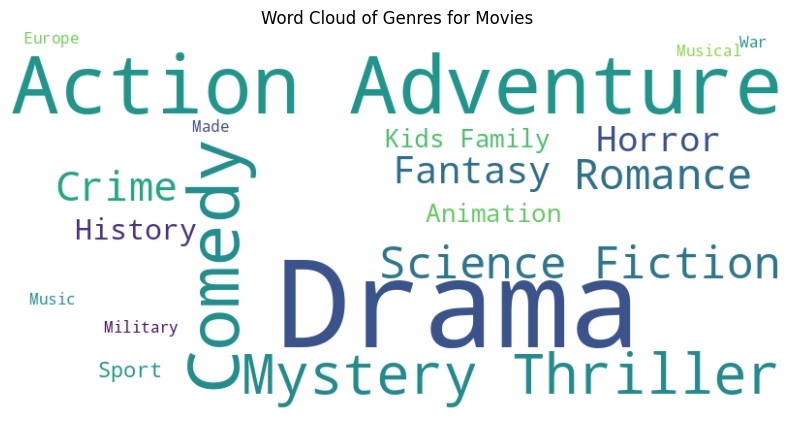

In [325]:
# Write Your Code here
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all genres into a single string
genres_corpus = ' '.join(movies['Generes'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres for Movies')
plt.show()



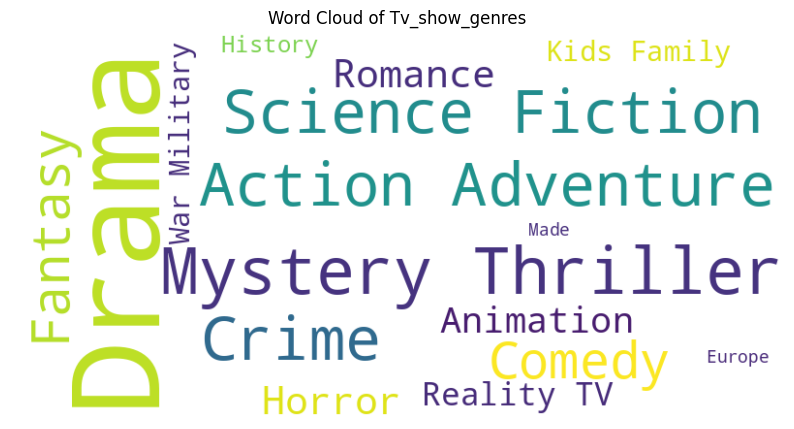

In [326]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all genres into a single string
genres_corpus = ' '.join(tv_show['Generes'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tv_show_genres')
plt.show()

## **Finding Predominant Streaming Service**

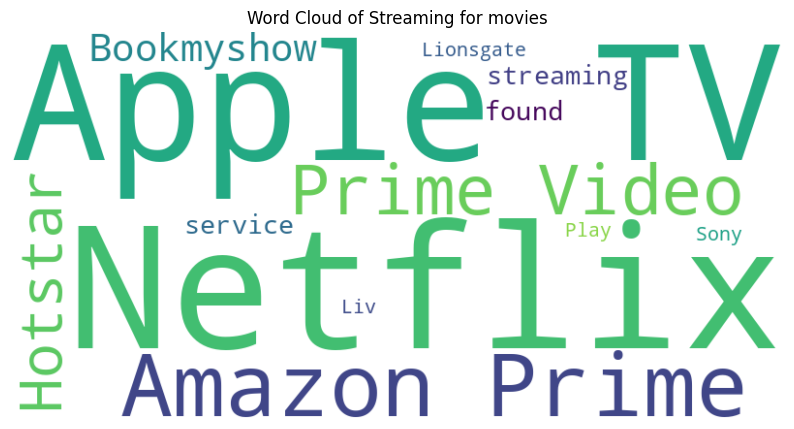

In [333]:
# Write Your Code here
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Concatenate all streaming service into a single string
streaming_corpus = ' '.join(movies['streaming service'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Streaming for movies')
plt.show()


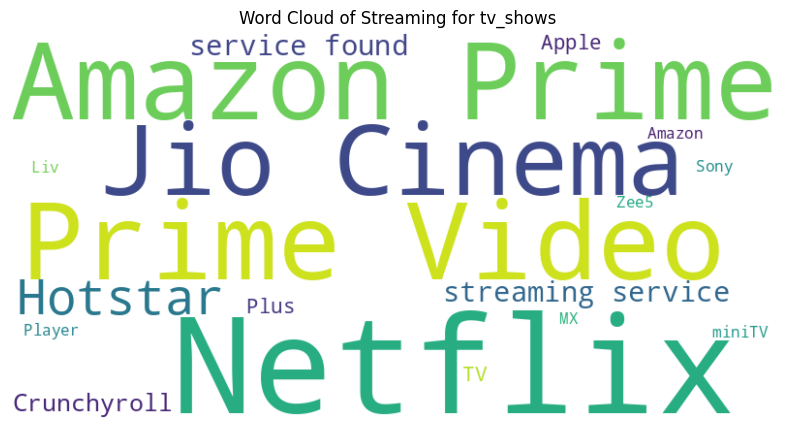

In [335]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all streaming service into a single string
streaming_corpus = ' '.join(tv_show['streaming service'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Streaming for tv_shows')
plt.show()


## **Task 3 :- Data Export**

In [336]:
#saving final dataframe as Final Data in csv format

movies.to_csv('movies.csv', index=False)
tv_show.to_csv('tv_shows.csv', index=False)

In [337]:
#saving filter data as Filter Data in csv format

movies_new.to_csv('movies_filter.csv', index=False)
tv_show_new.to_csv('tv_shows_filter.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/file/d/1OHHUPjuwFj8ahJJ0ArCeFX8SVEboB8tC/view?usp=drive_link,

https://drive.google.com/file/d/1hIyty60DnA3bvg6aJxaE6hEU2xMCMokh/view?usp=drive_link,

https://drive.google.com/file/d/1lfqDH77RQE0CYuIhaH5xPcjc3v1rKAcM/view?usp=drive_link,

https://drive.google.com/file/d/1-Cgvvb7AiThHa9JgYZxe_TSX_R3eKJoc/view?usp=drive_link

# ***Congratulations!!! You have completed your Assignment.***